# Enunciado 

Un ciclo Brayton con regeneración que utiliza aire como fluido de trabajo tiene una relación de presiones de 7. Las temperaturas máximas del ciclo son 310 y 1150 K. Considere una eficiencia isentrópica de 75 por ciento para el compresor y de 82 por ciento para la turbina y una efectividad de 65 por ciento para el regenerador. Determine la destrucción de exergía total asociada con el ciclo, suponiendo una temperatura de la fuente de 1 500 K y una temperatura del sumidero de 290 K. También, determine la exergía de los gases de escape a la salida del regenerador. Use calores específicos variables para el aire.

In [246]:
import pyromat as pyro
import numpy as np
from colorama import Fore, Style
from matplotlib import pyplot as plt
%matplotlib inline

In [247]:
pyro.units.show()

         length : km m cm mm um nm A in nmi ft yd mile mi 
           time : ns us ms s min hr day year 
           mass : kg g mg lbm lb oz slug u amu 
          force : N kN lb kgf lbf oz 
          molar : kmol mol lbmol n Nm3 Ncum NL Ncc scf sci 
    temperature : K C F R eV 
         energy : J kJ cal kcal eV BTU 
         volume : m3 mm3 cm3 in3 ft3 L mL uL cum cc cumm cuin cuft gal USgal UKgal qt pt 
       pressure : Pa kPa MPa GPa bar atm Torr mmHg mmH2O psi psf ksi inHg inH2O 
See also...
  abs_to_gauge()        Absolute to gauge pressure
  gauge_to_abs()        Gauge to absolute pressure
  matter()              Moles and mass conversions
  temperature_scale()   Correct handling of non-absolute temperatures


In [248]:
pyro.config["unit_pressure"]="kPa"
pyro.config["unit_temperature"]="K"

In [249]:
pyro.config

     config_file : ['/Users/daniel/miniforge3/envs/termodinamica/lib/...
  config_verbose : False
         dat_dir : ['/Users/daniel/miniforge3/envs/termodinamica/lib/...
 dat_exist_fatal : False
   dat_overwrite : True
   dat_recursive : True
     dat_verbose : False
           def_T : 298.15
         def_oob : nan
           def_p : 1.01325
   error_verbose : True
     install_dir : '/Users/daniel/miniforge3/envs/termodinamica/lib/p...
         reg_dir : ['/Users/daniel/miniforge3/envs/termodinamica/lib/...
 reg_exist_fatal : False
   reg_overwrite : True
     reg_verbose : False
     unit_energy : 'kJ'
      unit_force : 'N'
     unit_length : 'm'
       unit_mass : 'kg'
     unit_matter : 'kg'
      unit_molar : 'kmol'
   unit_pressure : 'kPa'
unit_temperature : 'K'
       unit_time : 's'
     unit_volume : 'm3'
         version : '2.2.4'
 warning_verbose : True

In [250]:
aire = pyro.get('ig.air')

## Datos conocidos

In [251]:
T_1 = 310 # K
T_3 = 1150 # K
eficiencia_compresor = 0.75
eficacia = 0.65
eficiencia_turbina = 0.82
relacion_presiones = 7
T_sumidero = 290 # K
T_fuente = 1500 # K
R = aire.R()

In [252]:
def get_T_2_from_T_1(T_1, relacion_presion, k):
    """
        Esta función calcula la temperatura final de un gas ideal a partir de la inicial,
        se debe tener en cuenta que la relación de presión  y la constante de los gases ideales
    """
    T_2 = T_1 * pow(relacion_presion, (k-1)/k)
    return T_2


def get_T_2s_by_T_1(T_1, relacion_presion):
    """
        Descripción
        -----------
        Esta función calcula la temperatura final de un gas ideal a partir de la inicial, 
        iterando el valor con el fin de converger a la temperatura final, usando el suposición
        de gas ideal.

        Base
        ----
        pv = nRT

        p * v ^ k  = constante

        p1 * v1 ^ k = p2 * v2 ^ k

        v2 = v1 * (p1 / p2) ^ (1/k)

        T2 = T1 * (p1 / p2) ^ ((k-1)/k)
    """

    cp_1 = aire.cp(T=T_1)[0]
    cv_1 = aire.cv(T=T_1)[0]
    k_prom_1_2 = k_1 = cp_1 / cv_1
    print("cp_1 = ", cp_1, "kJ/kg*K", "cv_1 = ", cv_1, "KJ/kg*K", "k_1 = ", k_1, "\n")
    for i in range(4):
        T_2s = get_T_2_from_T_1(T_1, relacion_presion, k_prom_1_2)
        cp_2s = aire.cp(T=T_2s)[0]
        cv_2s = aire.cv(T=T_2s)[0]
        k_2s = cp_2s / cv_2s
        k_prom_1_2 = (k_1 + k_2s) / 2
        print("cp_2s = ", cp_2s, "kJ/kg*K", "cv_2s = ", cv_2s, "KJ/kg*K", "k_2s = ", k_2s)
        print("k_prom = ", k_prom_1_2)
        print(Fore.LIGHTMAGENTA_EX,"T_2s = ", T_2s, "K", Style.RESET_ALL, "\n")

    return T_2s

## Estados conocidos

In [253]:
estado_1 = aire.state(T=T_1)
h_1 = estado_1.get("h")[0]
s_1 = estado_1.get("s")[0]
v_1 = estado_1.get("v")[0]
cp_1 = estado_1.get("cp")[0]
estado_1

{'T': array([310.]),
 'p': array([1.01325]),
 'd': array([0.01138658]),
 'v': array([87.82267382]),
 'h': array([7.64420957]),
 'e': array([-81.34211467]),
 'gam': array([1.39957562]),
 's': array([8.0588086]),
 'cp': array([1.00544649]),
 'cv': array([0.71839384])}

In [254]:
estado_3 = aire.state(T=T_3)
h_3 = estado_3.get("h")[0]
s_3 = estado_3.get("s")[0]
v_3 = estado_3.get("v")[0]
cp_3 = estado_3.get("cp")[0]
estado_3

{'T': array([1150.]),
 'p': array([1.01325]),
 'd': array([0.00306943]),
 'v': array([325.79378997]),
 'h': array([916.58419913]),
 'e': array([586.47364144]),
 'gam': array([1.32725448]),
 's': array([9.45320337]),
 'cp': array([1.16420692]),
 'cv': array([0.87715426])}

## estado 2

In [255]:
T_2s = get_T_2s_by_T_1(T_1, relacion_presiones)
h_2s = aire.h(T=T_2s,)[0]
print(Fore.LIGHTRED_EX,"h_2s = ", h_2s, "kJ/kg", Style.RESET_ALL, "\n")
h_2a = h_1 + (h_2s - h_1) / eficiencia_compresor
T_2a = aire.T(h=h_2a)[0]
estado_2a = aire.state(T=T_2a)
s_2a = estado_2a.get("s")[0]
cp_2a = estado_2a.get("cp")[0]
print(Fore.LIGHTRED_EX,"h_2a = ", h_2a, "kJ/kg", Style.RESET_ALL, "\n")
print(Fore.LIGHTRED_EX,"T_2a = ", T_2a, "K", Style.RESET_ALL, "\n")
estado_2a

cp_1 =  1.0054464938794279 kJ/kg*K cv_1 =  0.7183938350200206 KJ/kg*K k_1 =  1.3995756155833485 

cp_2s =  1.0377114845235094 kJ/kg*K cv_2s =  0.750658825664102 KJ/kg*K k_2s =  1.3824009643867892
k_prom =  1.390988289985069
 T_2s =  540.3003368921447 K  

cp_2s =  1.036781025541943 kJ/kg*K cv_2s =  0.7497283666825357 KJ/kg*K k_2s =  1.3828755474860623
k_prom =  1.3912255815347054
 T_2s =  535.6825533099121 K  

cp_2s =  1.0368066618436047 kJ/kg*K cv_2s =  0.7497540029841974 KJ/kg*K k_2s =  1.382862455841343
k_prom =  1.3912190357123457
 T_2s =  535.8103864164374 K  

cp_2s =  1.0368059545936148 kJ/kg*K cv_2s =  0.7497532957342076 KJ/kg*K k_2s =  1.3828628169994324
k_prom =  1.3912192162913906
 T_2s =  535.8068602433118 K  

 h_2s =  237.64280955161485 kJ/kg  

 h_2a =  314.3090095449494 kJ/kg  

 T_2a =  609.2054266037055 K  



{'T': array([609.2054266]),
 'p': array([1.01325]),
 'd': array([0.00579417]),
 'v': array([172.58725635]),
 'h': array([314.30900954]),
 'e': array([139.43497205]),
 'gam': array([1.37498656]),
 's': array([8.74947202]),
 'cp': array([1.05255385]),
 'cv': array([0.7655012])}

In [256]:
cp_prom_1_2 = (cp_1 + cp_2a) / 2
print("cp promedio 1 y 2 = ", cp_prom_1_2, "kJ/kg*K", "\n")
diferencia_entropia_1_2 = cp_prom_1_2 * np.log(T_2a / T_1) - R * np.log(relacion_presiones)
print(Fore.CYAN,"diferencia_entropia_1_2 = ", diferencia_entropia_1_2, "kJ/kg*K", Style.RESET_ALL)
exergia_destruida_1_2 = diferencia_entropia_1_2 * T_sumidero
print("exergia_destruida_1_2 = ", exergia_destruida_1_2, "kJ/kg", Style.RESET_ALL, "\n")

cp promedio 1 y 2 =  1.0290001741049666 kJ/kg*K 

 diferencia_entropia_1_2 =  0.13659658039707878 kJ/kg*K 
exergia_destruida_1_2 =  39.61300831515285 kJ/kg  



## Estado 4

In [257]:
T_4s = get_T_2s_by_T_1(T_3, 1/relacion_presiones)
h_4s = aire.h(T=T_4s,)[0]
print(Fore.LIGHTRED_EX,"h_4s = ", h_4s, "kJ/kg", Style.RESET_ALL, "\n")
h_4a = h_3 - (h_3 - h_4s) * eficiencia_turbina
T_4a = aire.T(h=h_4a)[0]
estado_4a = aire.state(T=T_4a)
s_4a = estado_4a.get("s")[0]
cp_4a = estado_4a.get("cp")[0]
print(Fore.LIGHTRED_EX,"h_4a = ", h_4a, "kJ/kg", Style.RESET_ALL, "\n")
print(Fore.LIGHTRED_EX,"T_4a = ", T_4a, "K", Style.RESET_ALL, "\n")
estado_4a

cp_1 =  1.1642069219618247 kJ/kg*K cv_1 =  0.8771542631024174 KJ/kg*K k_1 =  1.3272544761329979 

cp_2s =  1.0769601272872371 kJ/kg*K cv_2s =  0.7899074684278298 KJ/kg*K k_2s =  1.36340036059
k_prom =  1.345327418361499
 T_2s =  711.7480029418149 K  

cp_2s =  1.0735608805406085 kJ/kg*K cv_2s =  0.7865082216812013 KJ/kg*K k_2s =  1.364970957640872
k_prom =  1.346112716886935
 T_2s =  697.8668390854638 K  

cp_2s =  1.07341712428203 kJ/kg*K cv_2s =  0.7863644654226226 KJ/kg*K k_2s =  1.3650376784321432
k_prom =  1.3461460772825706
 T_2s =  697.2782157338347 K  

cp_2s =  1.0734110245262831 kJ/kg*K cv_2s =  0.7863583656668759 KJ/kg*K k_2s =  1.3650405100173004
k_prom =  1.3461474930751491
 T_2s =  697.2532365251277 K  

 h_4s =  407.8910615977141 kJ/kg  

 h_4a =  499.45582635307403 kJ/kg  

 T_4a =  781.7389016080069 K  



{'T': array([781.73890161]),
 'p': array([1.01325]),
 'd': array([0.00451537]),
 'v': array([221.46580828]),
 'h': array([499.45582635]),
 'e': array([275.05559611]),
 'gam': array([1.35564926]),
 's': array([9.01685123]),
 'cp': array([1.09417555]),
 'cv': array([0.80712289])}

In [258]:
cp_prom_3_4 = (cp_3 + cp_4a) / 2
print("cp promedio 3 y 4 = ", cp_prom_3_4, "kJ/kg*K", "\n")
diferencia_entropia_3_4 = cp_prom_3_4 * np.log(T_4a / T_3) - R * np.log(1/relacion_presiones)
print(Fore.CYAN,"diferencia_entropia_3_4 = ", diferencia_entropia_3_4, "kJ/kg*K", Style.RESET_ALL)
exergia_destruida_3_4 = diferencia_entropia_3_4 * T_sumidero
print("exergia_destruida_3_4 = ", exergia_destruida_3_4, "kJ/kg", Style.RESET_ALL, "\n")

cp promedio 3 y 4 =  1.1291912342954782 kJ/kg*K 

 diferencia_entropia_3_4 =  0.1227149060232457 kJ/kg*K 
exergia_destruida_3_4 =  35.58732274674125 kJ/kg  



## Estado 5

In [259]:
h_5 = eficacia * (h_4a - h_2a) + h_2a
T_5 = aire.T(h=h_5)[0]
estado_5 = aire.state(T=T_5)
s_5 = estado_5.get("s")[0]
cp_5 = estado_5.get("cp")[0]
print(Fore.LIGHTRED_EX,"h_5 = ", h_5, "kJ/kg", Style.RESET_ALL, "\n")
estado_5

 h_5 =  434.6544404702304 kJ/kg  



{'T': array([722.11573505]),
 'p': array([1.01325]),
 'd': array([0.00488819]),
 'v': array([204.57462793]),
 'h': array([434.65444047]),
 'e': array([227.36919872]),
 'gam': array([1.36223194]),
 's': array([8.93063335]),
 'cp': array([1.07950806]),
 'cv': array([0.7924554])}

In [260]:
cp_prom_5_3 = (cp_5 + cp_3) / 2
print("cp promedio 5 y 3 = ", cp_prom_5_3, "kJ/kg*K", "\n")
diferencia_entropia_3_5 = cp_prom_5_3 * np.log(T_3 / T_5) 
print(Fore.CYAN,"diferencia_entropia_3_5 = ", diferencia_entropia_3_5, "kJ/kg*K", Style.RESET_ALL)

calor_entrada_5_3 = h_3 - h_5
print(Fore.CYAN,"calor_entrada_5_3 = ", calor_entrada_5_3, "kJ/kg", Style.RESET_ALL, "\n")

exergia_destruida_3_5 = T_sumidero * (diferencia_entropia_3_5  - calor_entrada_5_3 / T_fuente)
print("exergia_destruida_3_5 = ", exergia_destruida_3_5, "kJ/kg", Style.RESET_ALL, "\n")


cp promedio 5 y 3 =  1.1218574922834037 kJ/kg*K 

 diferencia_entropia_3_5 =  0.5220359633743973 kJ/kg*K 
 calor_entrada_5_3 =  481.929758657261 kJ/kg  

exergia_destruida_3_5 =  58.21734270483808 kJ/kg  



## Regenerador

In [261]:
h_6 = h_4a - (h_4a - h_2a) * eficacia
h_6

379.11039542779304

In [262]:
T_6 = aire.T(h=h_6)[0]
estado_6 = aire.state(T=T_6)
s_6 = estado_6.get("s")[0]
cp_6 = estado_6.get("cp")[0]
print(Fore.LIGHTRED_EX,"h_6 = ", h_6, "kJ/kg", Style.RESET_ALL, "\n")
estado_6

 h_6 =  379.11039542779304 kJ/kg  



{'T': array([670.35897334]),
 'p': array([1.01325]),
 'd': array([0.0052656]),
 'v': array([189.9119918]),
 'h': array([379.11039543]),
 'e': array([186.68206974]),
 'gam': array([1.36809402]),
 's': array([8.85082494]),
 'cp': array([1.06688781]),
 'cv': array([0.77983515])}

In [263]:
cp_prom_5_2 = (cp_5 + cp_2a) / 2
print("cp promedio 5 y 2 = ", cp_prom_5_2, "kJ/kg*K", "\n")
diferencia_entropia_2_5 = cp_prom_5_2 * np.log(T_5 / T_2a)
cp_prom_6_4 = (cp_6 + cp_4a) / 2
print("cp promedio 6 y 4 = ", cp_prom_6_4, "kJ/kg*K", "\n")
diferencia_entropia_4_6 = cp_prom_6_4 * np.log(T_6 / T_4a)


print(Fore.CYAN,"diferencia_entropia_2_5 = ", diferencia_entropia_2_5, "kJ/kg*K", Style.RESET_ALL)
print(Fore.CYAN,"diferencia_entropia_4_6 = ", diferencia_entropia_4_6, "kJ/kg*K", Style.RESET_ALL)

exergia_destruida_regeneracion = T_sumidero * (diferencia_entropia_2_5 + diferencia_entropia_4_6)
print("exergia_destruida_regeneracion = ", exergia_destruida_regeneracion, "kJ/kg", Style.RESET_ALL, "\n")

cp promedio 5 y 2 =  1.0660309584677439 kJ/kg*K 

cp promedio 6 y 4 =  1.0805316795526339 kJ/kg*K 

 diferencia_entropia_2_5 =  0.18125713211134958 kJ/kg*K 
 diferencia_entropia_4_6 =  -0.16608576842662573 kJ/kg*K 
exergia_destruida_regeneracion =  4.3996954685699174 kJ/kg  



## Salida

In [264]:
cp_prom_6_1 = (cp_6 + cp_1) / 2
print("cp promedio 6 y 1 = ", cp_prom_6_1, "kJ/kg*K", "\n")
diferencia_entropia_1_6 = cp_prom_6_1 * np.log(T_1 / T_6)
print(Fore.CYAN,"diferencia_entropia_1_6 = ", diferencia_entropia_1_6, "kJ/kg*K", Style.RESET_ALL)
calor_salida_6_1 = h_6 - h_1
print(Fore.CYAN,"calor_salida_6_1 = ", calor_salida_6_1, "kJ/kg", Style.RESET_ALL, "\n")
exergia_destruida_1_6 = T_sumidero * (diferencia_entropia_1_6 + calor_salida_6_1 / T_sumidero)
print("exergia_destruida_1_6 = ", exergia_destruida_1_6, "kJ/kg", Style.RESET_ALL, "\n")

cp promedio 6 y 1 =  1.0361671531777819 kJ/kg*K 

 diferencia_entropia_1_6 =  -0.7991346458170007 kJ/kg*K 
 calor_salida_6_1 =  371.4661858561817 kJ/kg  

exergia_destruida_1_6 =  139.71713856925155 kJ/kg  



In [265]:
estado_sumidero = aire.state(T=T_sumidero)
cp_sumidero = estado_sumidero.get("cp")[0]
h_sumidero = estado_sumidero.get("h")[0]
estado_sumidero

{'T': array([290.]),
 'p': array([1.01325]),
 'd': array([0.01217186]),
 'v': array([82.15669486]),
 'h': array([-12.45274312]),
 'e': array([-95.69801419]),
 'gam': array([1.40021455]),
 's': array([7.99179435]),
 'cp': array([1.00429959]),
 'cv': array([0.71724693])}

In [266]:
cp_prom = (cp_6 + cp_sumidero) / 2
print("cp promedio 6 y sumidero = ", cp_prom, "kJ/kg*K", "\n")

cp promedio 6 y sumidero =  1.035593698759235 kJ/kg*K 



In [269]:
exergia_6 = (h_6 - h_sumidero) - T_sumidero * cp_prom * np.log(T_6 / T_sumidero)
print("exergia 6 = ", exergia_6, "kJ/kg", Style.RESET_ALL, "\n")

exergia 6 =  139.91345153571157 kJ/kg  



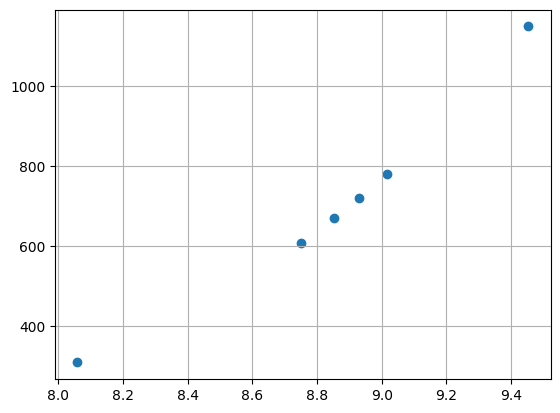

In [267]:
plt.scatter([s_1, s_2a, s_3, s_4a, s_5, s_6], [T_1, T_2a, T_3, T_4a, T_5, T_6])
plt.grid(True)